In [3]:
import os

import geopandas as gpd
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import pycountry


filename = 'combined_data.csv'
df = pd.read_csv(filename)
print("loaded csv file with n datapoints: ", len(df))

# df = df_sample

# Create a set with all country names available in pycountry
countries = {country.name for country in pycountry.countries}


# Function to extract country names from the Entities column
def extract_countries(entities):
    extracted_countries = []
    entities_split = entities.split(';')

    for entity in entities_split:
        if entity:  # Check if the entity part is not empty
            parts = entity.split(':')
            # Check if the parsed entity could be a country by matching it with our set
            if len(parts) > 1 and parts[1] in countries:
                extracted_countries.append(parts[1])

    # Join the extracted country names with a space
    return ' '.join(extracted_countries)


# Apply the function to create the 'Countries' column
df['Countries'] = df['Entities'].apply(extract_countries)

print("calculated country column")

# %%
# Replace 'null;' and empty strings with pd.NA in 'Countries' column
df['Countries'] = df['Countries'].replace({'null;': pd.NA, '': pd.NA})

# Drop rows where 'Countries' is NA after the replacements
df.dropna(subset=['Countries'], inplace=True)

print("dropped missing data")

df.to_csv("country_annotated_data.csv")

print("wrote csv")
# %%

loaded csv file with n datapoints:  15149379
calculated country column
dropped missing data
wrote csv


/tmp/ipykernel_15981/2513845053.py:22: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


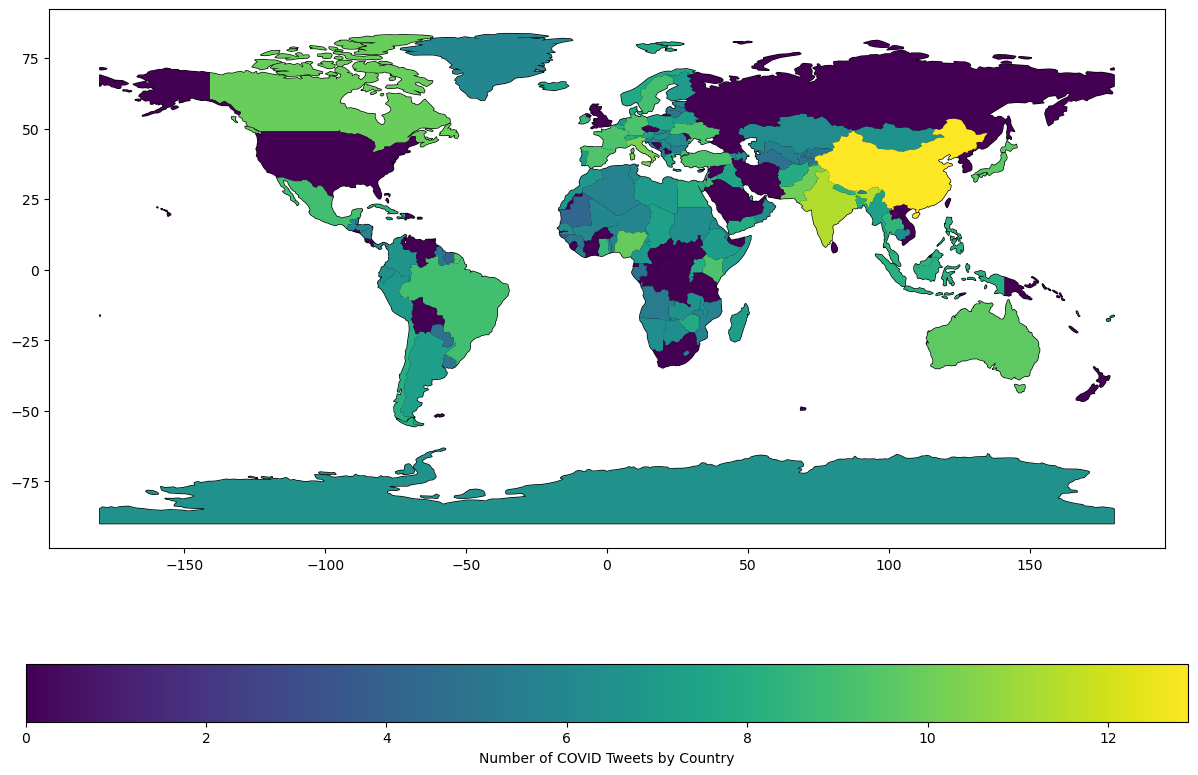

In [4]:

df['Countries'] = df['Countries'].str.split()
df['Countries'] = df['Countries'].apply(lambda x: list(set(x)))
df['Countries'] = df['Countries'].apply(lambda x: x[0])

filename_2 = "covid_cleaned.csv"
df.to_csv(filename_2)

# Set the environment variable
os.environ['CRYPTOGRAPHY_OPENSSL_NO_LEGACY'] = '1'

# Now you can import your cryptography library

# Convert the 'Timestamp' column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Aggregate data to get a count of tweets per country
country_counts = df.groupby('Countries').size().reset_index(name='counts')

country_counts["counts"] = country_counts["counts"].apply(lambda x: np.log(x))

# Read in a world map shapefile with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the world map with the tweet counts
world = world.merge(country_counts, how="left", left_on="name", right_on="Countries")

# Replace NaN values with 0 for countries with no data
world['counts'] = world['counts'].fillna(0)

# Plot a choropleth map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
base = world.plot(ax=ax, color='white', edgecolor='black')
world.plot(column='counts', ax=base, legend=True,
           legend_kwds={'label': "Number of COVID Tweets by Country",
                        'orientation': "horizontal"})
plt.show()

/tmp/ipykernel_15981/3924961902.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


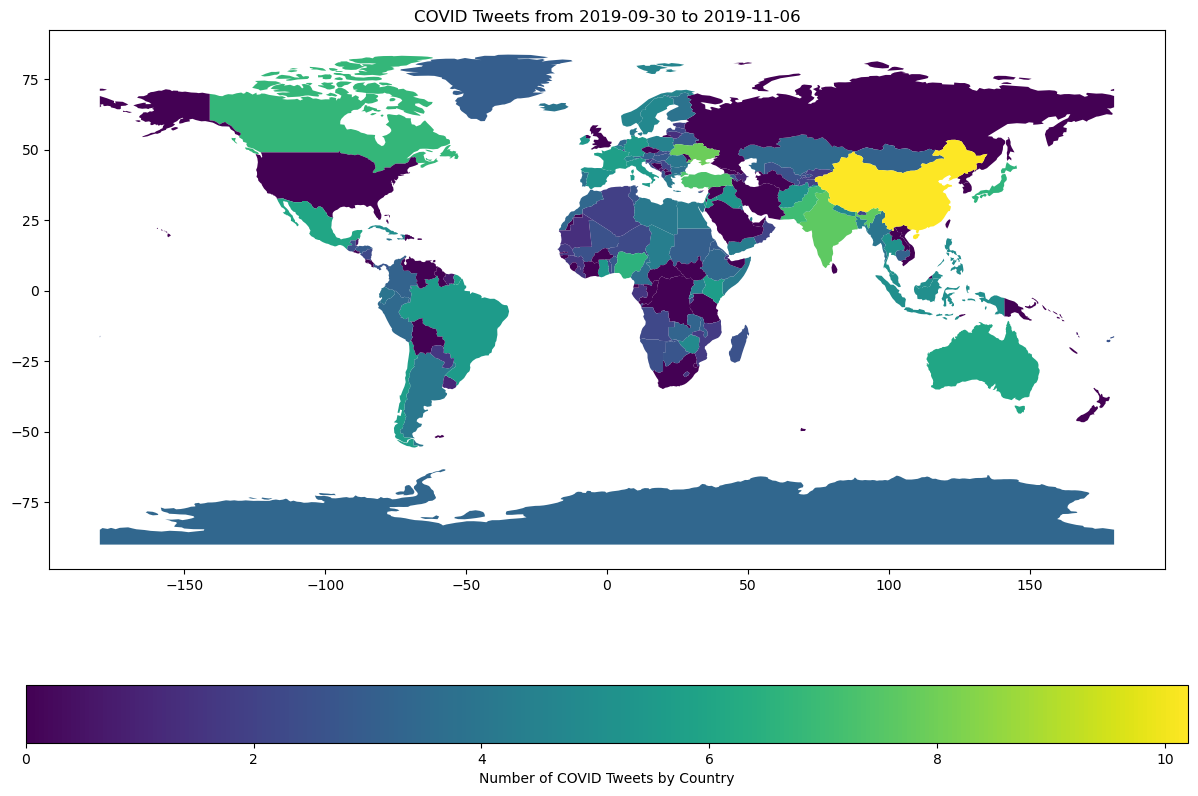

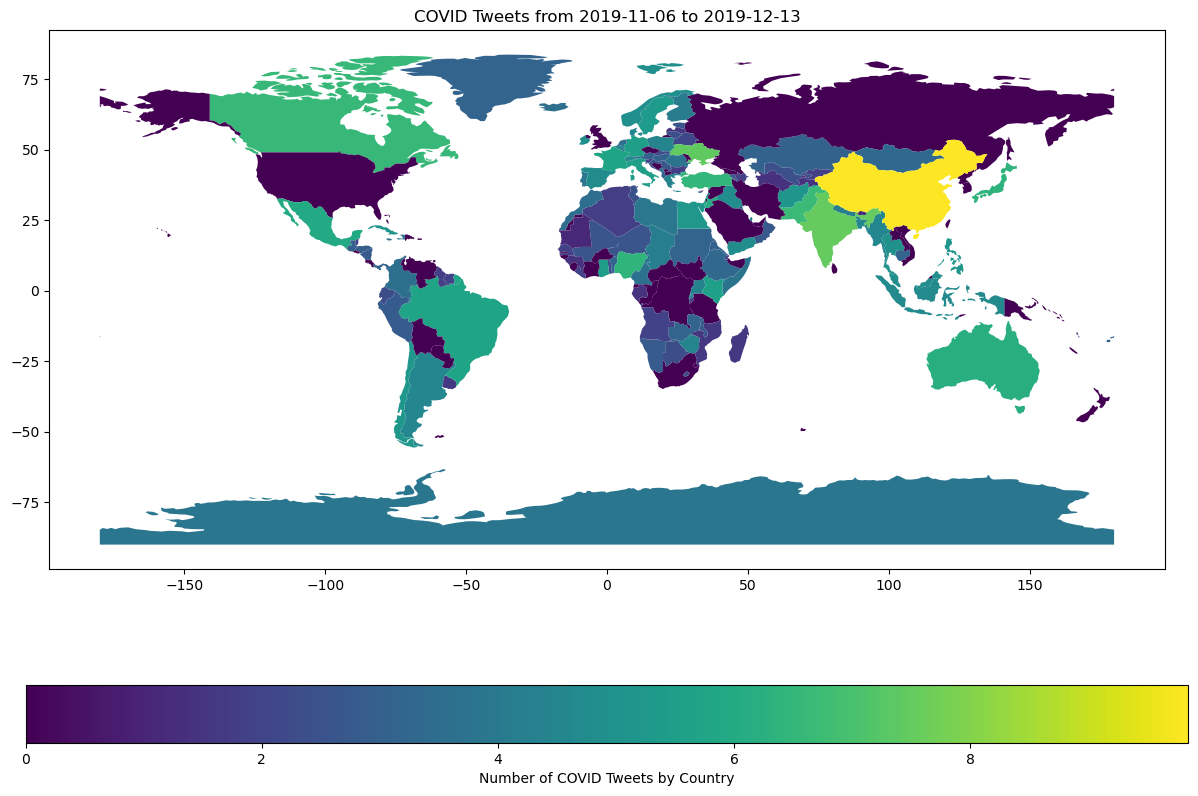

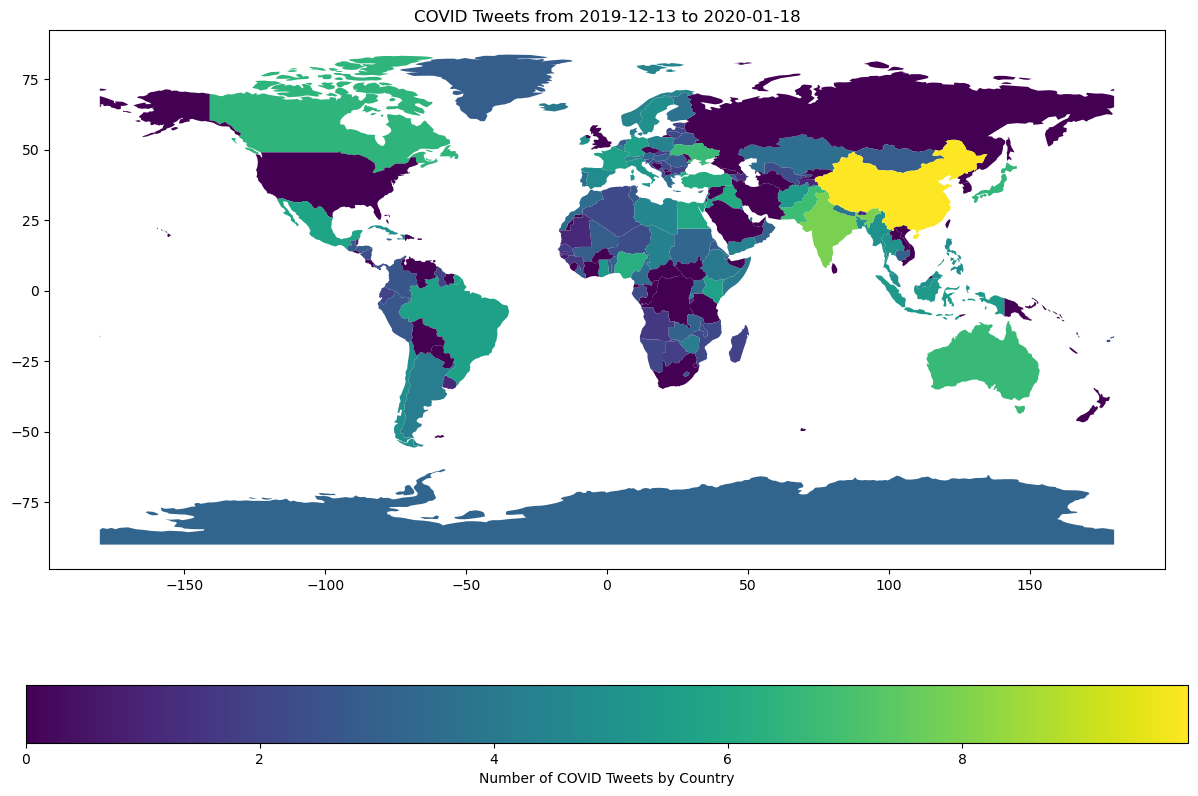

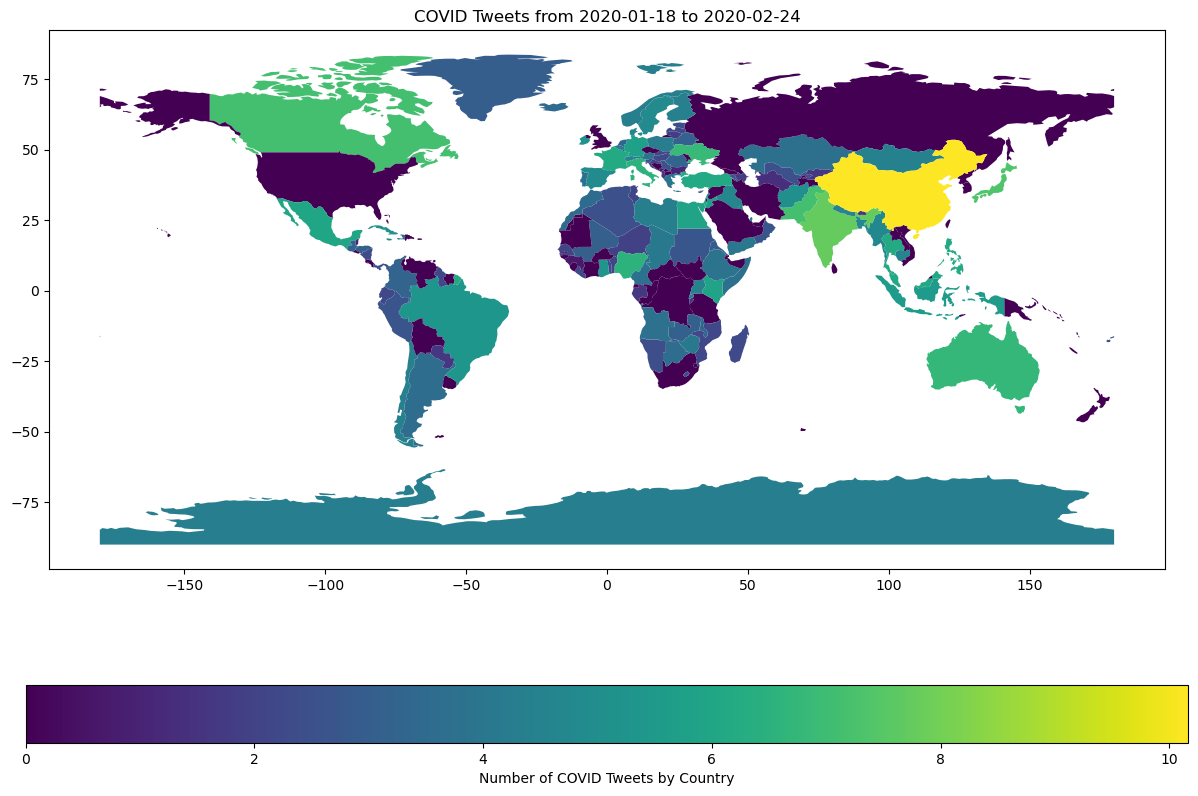

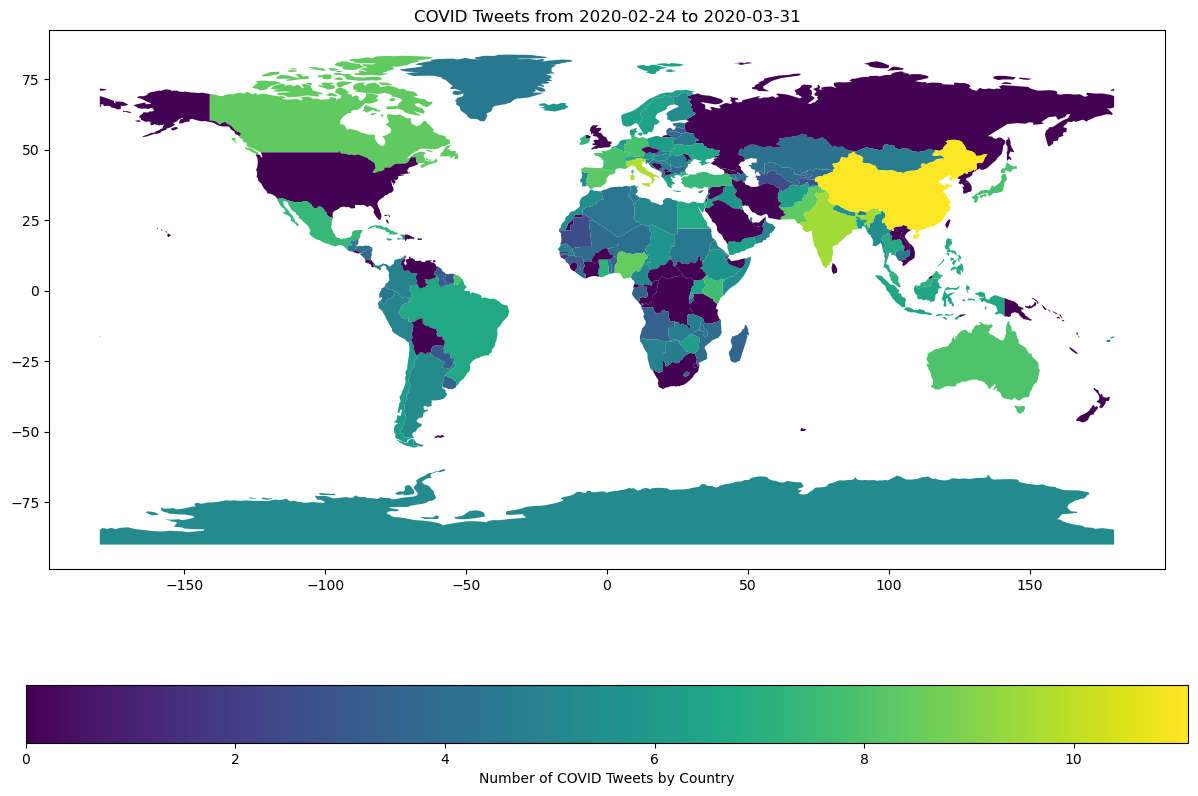

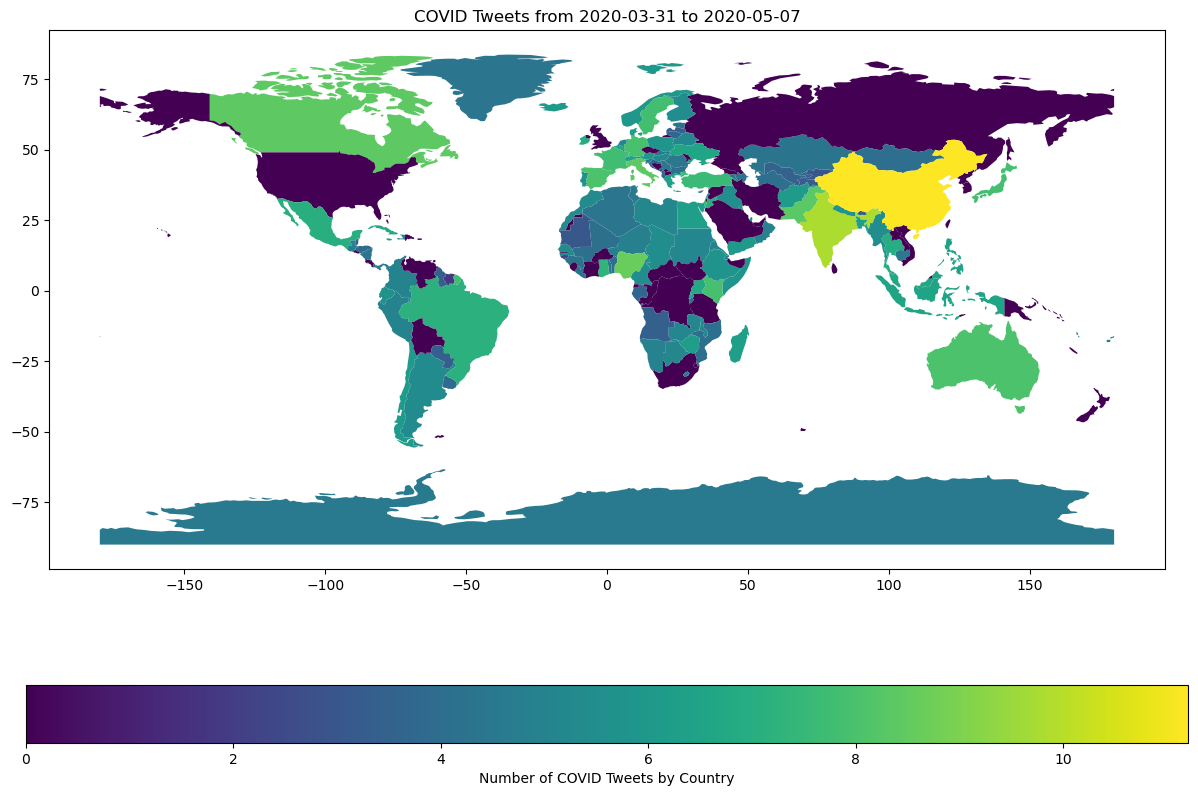

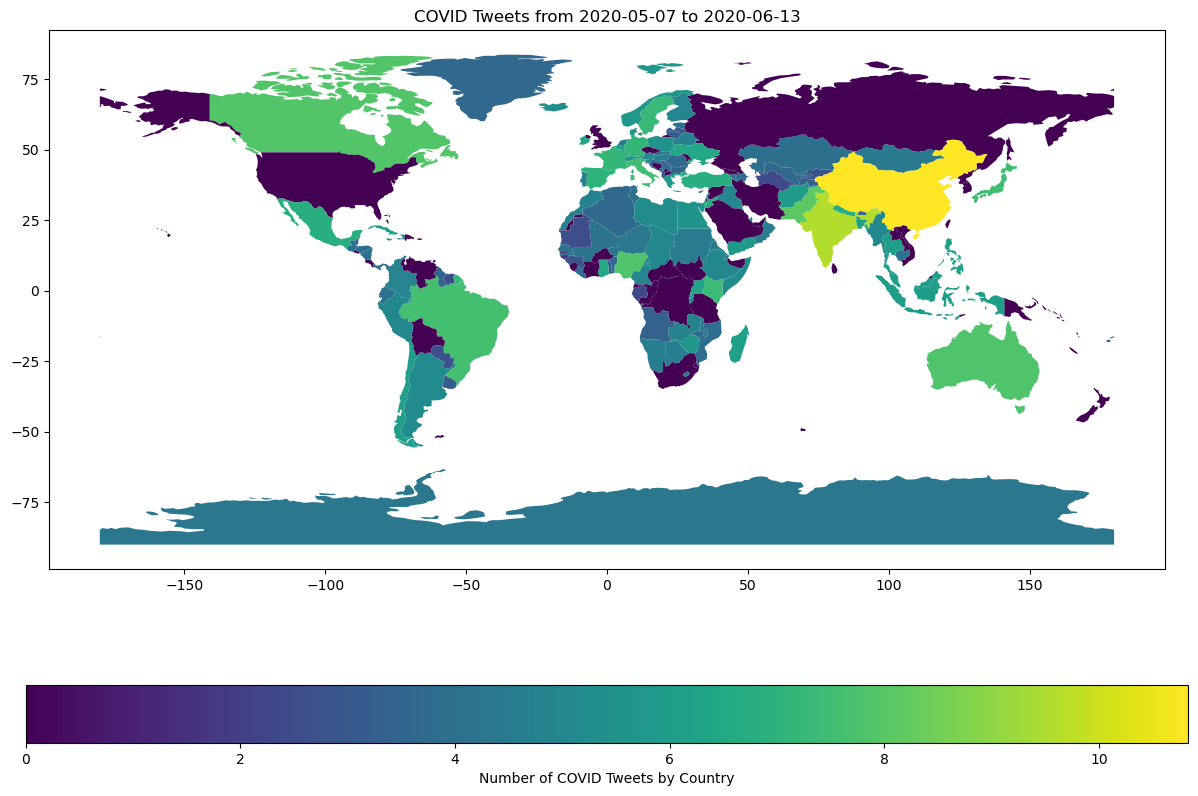

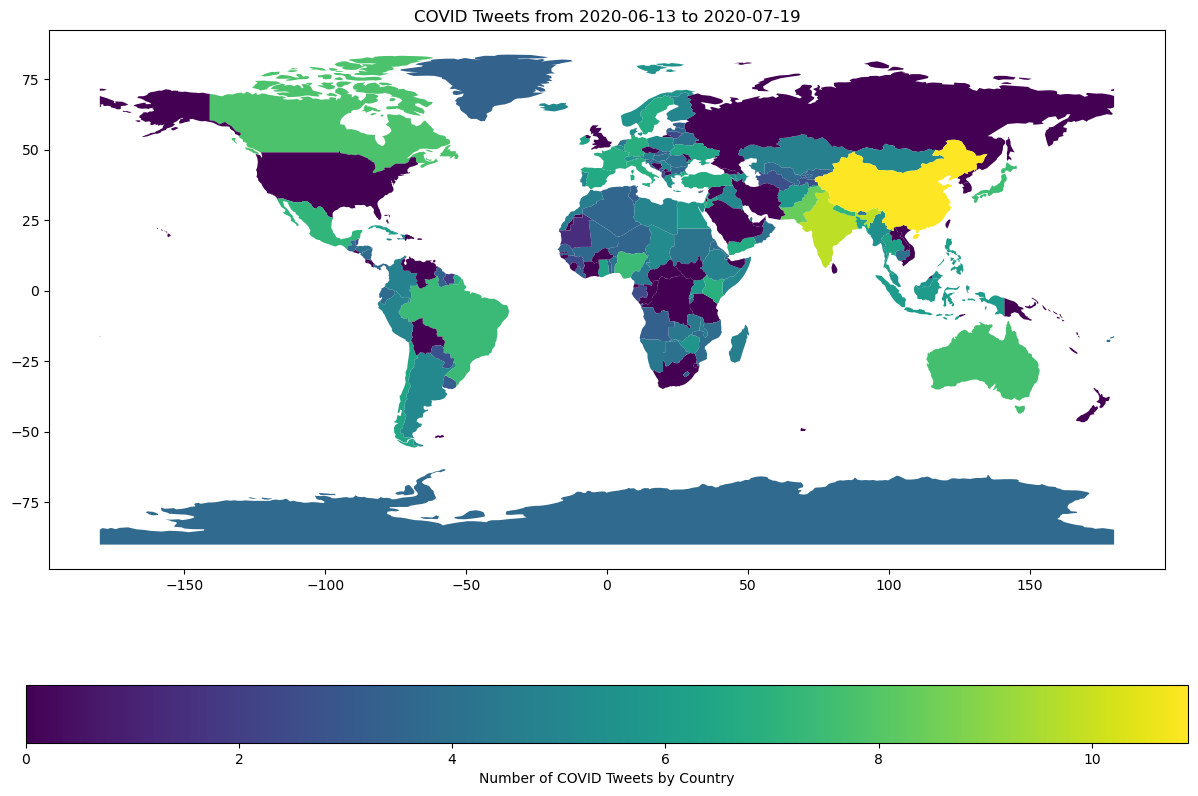

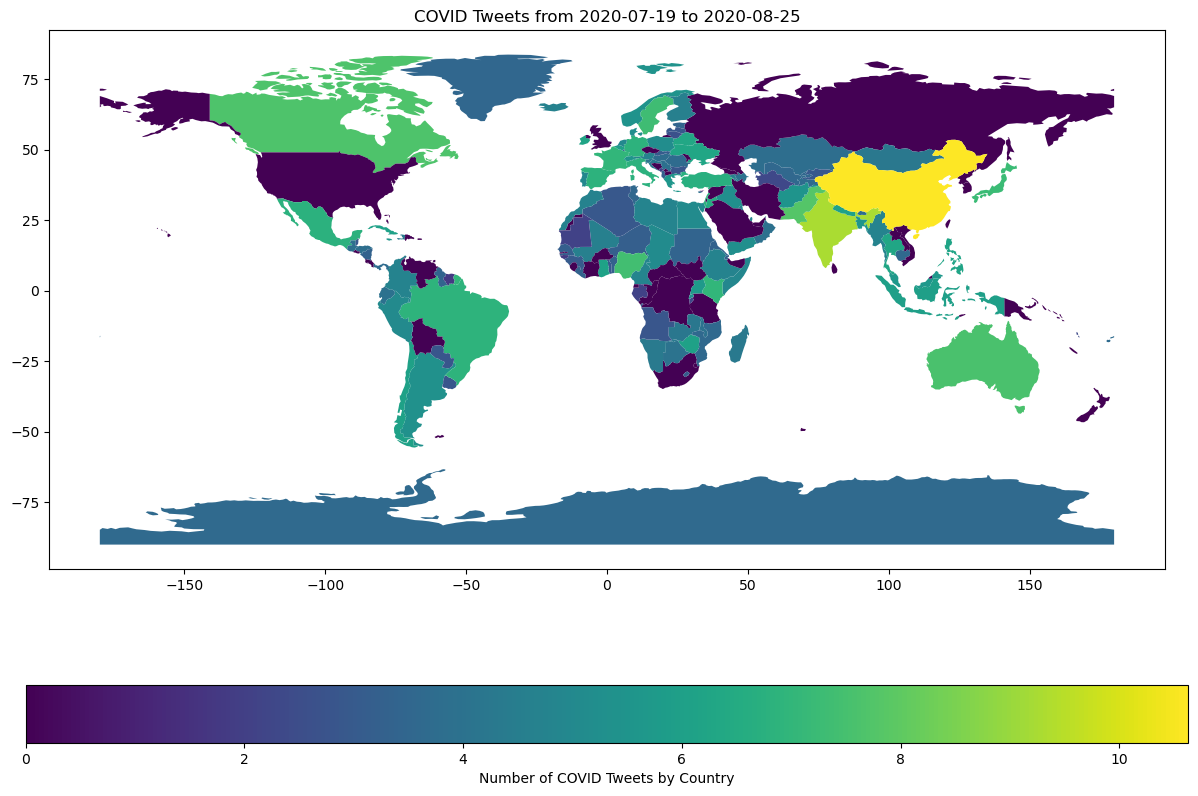

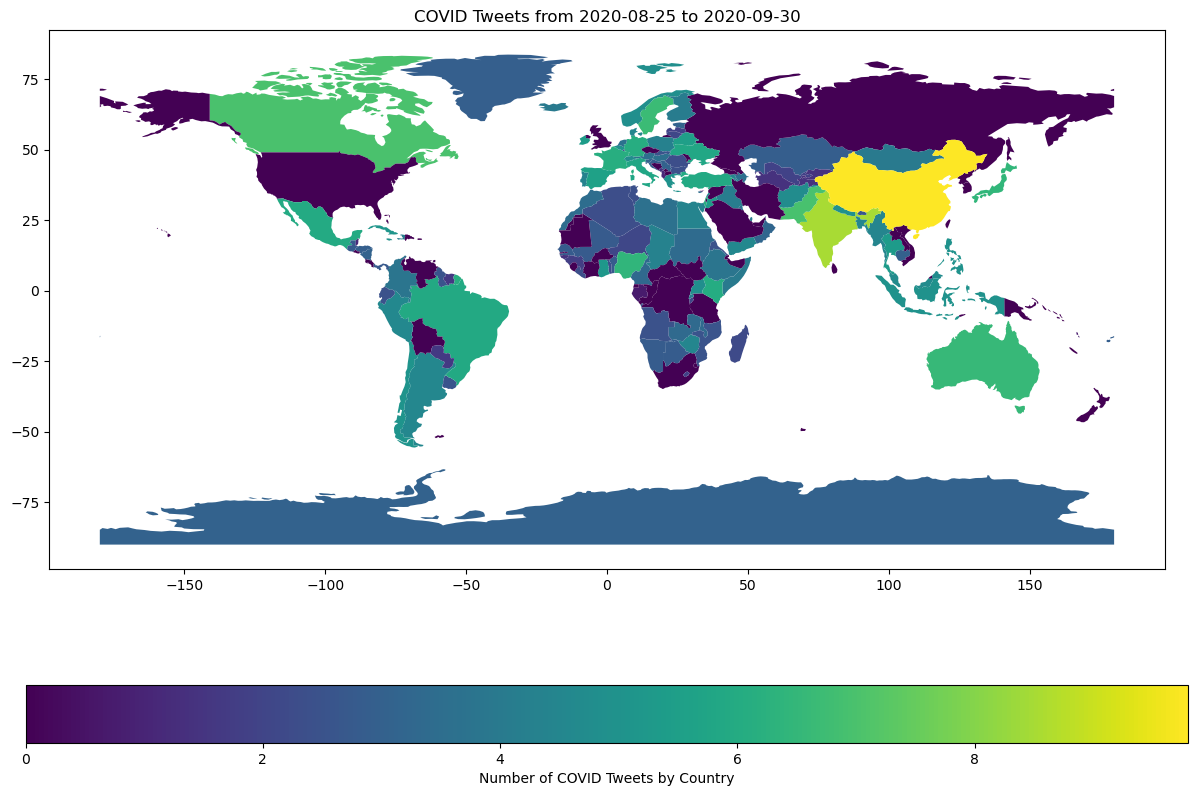

In [5]:

# Convert Timestamp to dateti
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Determine the time range and split into 10 intervals
time_range = pd.date_range(df['Timestamp'].min(), df['Timestamp'].max(), periods=11)

# Read in a world map shapefile with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

for start, end in zip(time_range[:-1], time_range[1:]):
    # Filter data for the current time slice
    df_slice = df[(df['Timestamp'] >= start) & (df['Timestamp'] < end)]

    # Aggregate data to get a count of tweets per country for the time slice
    country_counts = df_slice.groupby('Countries').size().reset_index(name='counts')
    country_counts["counts"] = country_counts["counts"].apply(lambda x: np.log(x))

    # Merge the world map with the tweet counts
    world_counts = world.merge(country_counts, how="left", left_on="name", right_on="Countries")

    # Replace NaN values with 0 for countries with no data
    world_counts['counts'] = world_counts['counts'].fillna(0)

    # Plot a choropleth map
    fig, ax = plt.subplots(1, figsize=(15, 10))
    world_counts.plot(column='counts', ax=ax, legend=True,
                      legend_kwds={'label': "Number of COVID Tweets by Country",
                                   'orientation': "horizontal"},
                      missing_kwds={"color": "lightgrey"})
    plt.title(f"COVID Tweets from {start.date()} to {end.date()}")
    plt.show()


In [ ]:
import os

import numpy as np
import geopandas as gpd
import pandas as pd

# %%
from matplotlib import pyplot as plt

filename = 'combined_data.csv'
df = pd.read_csv(filename)
print("loaded csv file with n datapoints: ", len(df))

# %%
import pycountry

# df = df_sample

# Create a set with all country names available in pycountry
countries = {country.name for country in pycountry.countries}


# Function to extract country names from the Entities column
def extract_countries(entities):
    extracted_countries = []
    entities_split = entities.split(';')

    for entity in entities_split:
        if entity:  # Check if the entity part is not empty
            parts = entity.split(':')
            # Check if the parsed entity could be a country by matching it with our set
            if len(parts) > 1 and parts[1] in countries:
                extracted_countries.append(parts[1])

    # Join the extracted country names with a space
    return ' '.join(extracted_countries)


# Apply the function to create the 'Countries' column
df['Countries'] = df['Entities'].apply(extract_countries)

print("calculated country column")

# %%
# Replace 'null;' and empty strings with pd.NA in 'Countries' column
df['Countries'] = df['Countries'].replace({'null;': pd.NA, '': pd.NA})

# Drop rows where 'Countries' is NA after the replacements
df.dropna(subset=['Countries'], inplace=True)

print("dropped missing data")

# df.to_csv("country_annotated_data.csv")

print("wrote csv")
# %%

df['Countries'] = df['Countries'].str.split()
df['Countries'] = df['Countries'].apply(lambda x: list(set(x)))
df['Countries'] = df['Countries'].apply(lambda x: x[0])

filename_2 = "covid_cleaned.csv"
# df.to_csv(filename_2)

# Set the environment variable
os.environ['CRYPTOGRAPHY_OPENSSL_NO_LEGACY'] = '1'

# Now you can import your cryptography library

# Convert the 'Timestamp' column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

